In [7]:
import urllib
import xlrd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
webpage = 'http://www.energystorageexchange.org/projects.xls'
date = datetime.date.today()
filename = 'projects' + '_' + str(datetime.date.today().year) + '-' + str(datetime.date.today().month)
filename = filename + '-' + str(datetime.date.today().day) + '.xls'
print filename
response = urllib.urlretrieve(webpage, filename)

projects_2015-9-13.xls


In [8]:
wb = xlrd.open_workbook(filename)
sh = wb.sheet_by_index(0)
num_rows = sh.nrows
num_cols = sh.ncols
d = {}
#for column in range(0,num_cols):
#    print column, sh.row_values(1)[column]
for row in range(1, 640):
    values = sh.row_values(row)
    name = values[0]
    category = values[2]
    latitude = values[19]
    longitude = values[20]
    power = values[4]
    duration = values[5]
    energy  = float(power)*(float(duration.split(':')[0]) + float(duration.split(':')[1])/60.0)
    d[name] = {}
    d[name]['category'] = {}
    d[name]['latitude'] = {}
    d[name]['latitude'] = {}
    d[name]['longitude'] = {}
    d[name]['power'] = {}
    d[name]['energy'] = {}
    
    d[name]['category'] = category
    d[name]['latitude'] = float(latitude)
    d[name]['longitude'] = float(longitude)
    d[name]['power'] = power
    d[name]['energy'] = energy

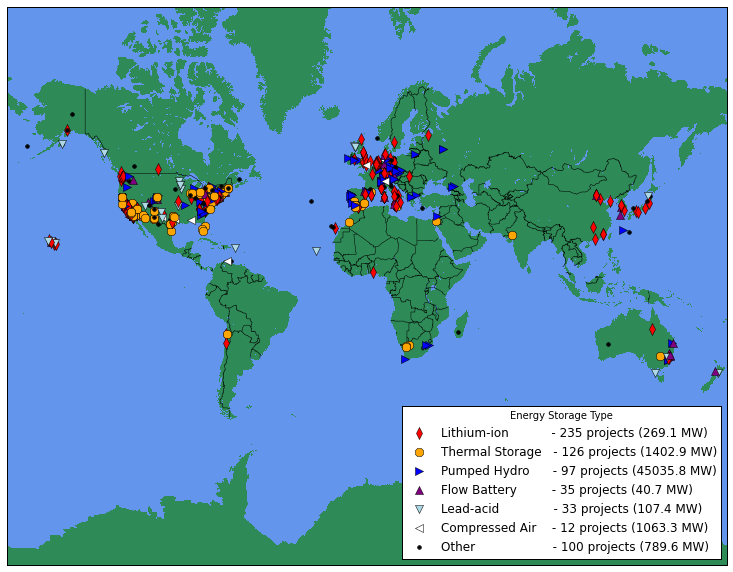

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

markersize = 8

map = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,
              llcrnrlon=-180,urcrnrlon=180,resolution='h')
map.drawlsmask(land_color='seagreen',ocean_color='cornflowerblue',lakes=True)
map.drawcountries()
count = 7*[0]
total_power = 7*[0]
for project in d.keys():
    if d[project]['category'] == 'Lithium-ion Battery':
        color = 'Red'
        marker = 'd'
        count[0] = count[0] + 1
        total_power[0] += d[project]['power']/1000.0
    elif d[project]['category'] == 'Flow Battery':
        color = 'Purple'
        marker = '^'
        count[1] = count[1] + 1
        total_power[1] += d[project]['power']/1000.0
    elif d[project]['category'] == 'Lead-acid Battery':
        color = 'LightBlue'
        marker = 'v'
        count[2] = count[2] + 1
        total_power[2] += d[project]['power']/1000.0
    elif 'Pumped Hydro' in d[project]['category']:
        color = 'Blue'
        marker = '>'
        count[3] = count[3] + 1
        total_power[3] += d[project]['power']/1000.0
    elif d[project]['category'] == 'Compressed Air Storage':
        color = 'White'
        marker = '<'
        count[4] = count[4] + 1
        total_power[4] += d[project]['power']/1000.0
    elif 'Thermal' in d[project]['category']:
        color = 'Orange'
        marker = '8'
        count[5] = count[5] + 1
        total_power[5] += d[project]['power']/1000.0
    else:
        color = 'Black'
        marker = '.'
        count[6] = count[6] + 1
        total_power[6] += d[project]['power']/1000.0
    x,y  = map(d[project]['longitude'], d[project]['latitude'])
    map.plot(x,y,marker=marker,color=color, markersize=markersize, label=d[project]['category'])
    

liion = plt.Line2D([0,0],[0,1], color='Red', marker='d', linestyle='', markersize=markersize)
flow = plt.Line2D([0,0],[0,1], color='Purple', marker='^', linestyle='', markersize=markersize)
lead = plt.Line2D([0,0],[0,1], color='LightBlue', marker='v', linestyle='', markersize=markersize)
hydro = plt.Line2D([0,0],[0,1], color='Blue', marker='>', linestyle='', markersize=markersize)
caes = plt.Line2D([0,0],[0,1], color='White', marker='<', linestyle='', markersize=markersize)
thermal = plt.Line2D([0,0],[0,1], color='Orange', marker='8', linestyle='', markersize=markersize)
other = plt.Line2D([0,0],[0,1], color='Black', marker='.', linestyle='', markersize=markersize)
ax.legend([liion, thermal, hydro, flow, lead, caes, other], ["Lithium-ion           - " + str(count[0]) + ' projects (' + str(round(total_power[0],1)) + ' MW)',
                                                               "Thermal Storage   - " + str(count[5]) + ' projects (' + str(round(total_power[5],1)) + ' MW)',
                                                               "Pumped Hydro      - " + str(count[3]) + ' projects (' + str(round(total_power[3],1)) + ' MW)',
                                                               "Flow Battery         - " + str(count[1]) + ' projects (' + str(round(total_power[1],1)) + ' MW)', 
                                                               "Lead-acid              - " + str(count[2]) + ' projects (' + str(round(total_power[2],1)) + ' MW)', 
                                                               "Compressed Air    - " + str(count[4]) + ' projects (' + str(round(total_power[4],1)) + ' MW)',
                                                               "Other                    - " + str(count[6]) + ' projects (' + str(round(total_power[6],1)) + ' MW)']
          , loc = 'lower right', numpoints=1, title='Energy Storage Type')
plt.show()

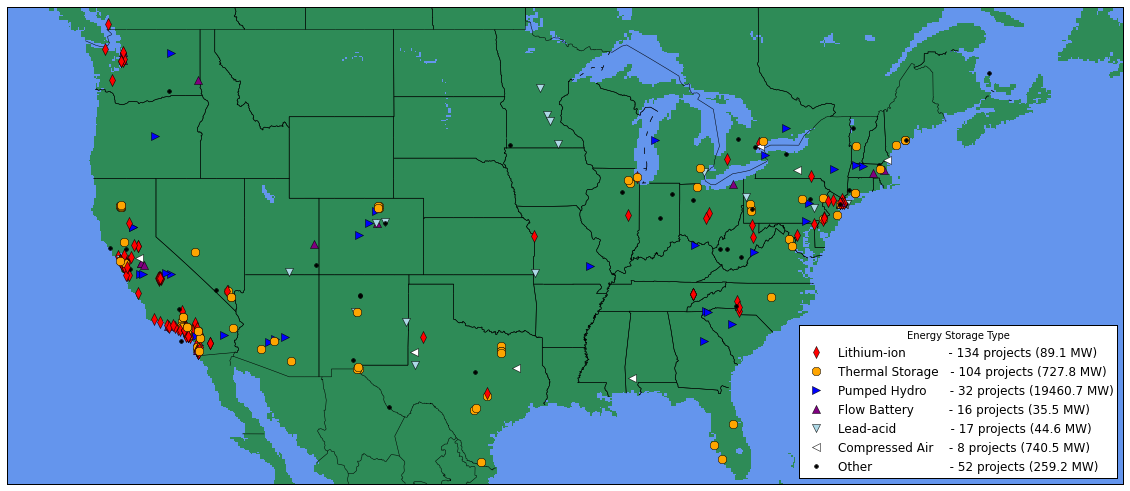

In [68]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

markersize = 8

map = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50,
              llcrnrlon=-130,urcrnrlon=-55,resolution='h')
map.drawlsmask(land_color='seagreen',ocean_color='cornflowerblue',lakes=True)
map.drawstates()
map.drawcountries()
count = 7*[0]
total_power = 7*[0]

def inUS(lat, lon):
    if lat > 25 and lat < 50 and lon > -130 and lon < -60:
        return True
    else:
        return False
    
for project in d.keys():
    if inUS(d[project]['latitude'], d[project]['longitude']):
        if d[project]['category'] == 'Lithium-ion Battery':
            color = 'Red'
            marker = 'd'
            count[0] = count[0] + 1
            total_power[0] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Flow Battery':
            color = 'Purple'
            marker = '^'
            count[1] = count[1] + 1
            total_power[1] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Lead-acid Battery':
            color = 'LightBlue'
            marker = 'v'
            count[2] = count[2] + 1
            total_power[2] += d[project]['power']/1000.0
        elif 'Pumped Hydro' in d[project]['category']:
            color = 'Blue'
            marker = '>'
            count[3] = count[3] + 1
            total_power[3] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Compressed Air Storage':
            color = 'White'
            marker = '<'
            count[4] = count[4] + 1
            total_power[4] += d[project]['power']/1000.0
        elif 'Thermal' in d[project]['category']:
            color = 'Orange'
            marker = '8'
            count[5] = count[5] + 1
            total_power[5] += d[project]['power']/1000.0
        else:
            color = 'Black'
            marker = '.'
            count[6] = count[6] + 1
            total_power[6] += d[project]['power']/1000.0
        x,y  = map(d[project]['longitude'], d[project]['latitude'])
        map.plot(x,y,marker=marker,color=color, markersize=markersize, label=d[project]['category'])
    

liion = plt.Line2D([0,0],[0,1], color='Red', marker='d', linestyle='', markersize=markersize)
flow = plt.Line2D([0,0],[0,1], color='Purple', marker='^', linestyle='', markersize=markersize)
lead = plt.Line2D([0,0],[0,1], color='LightBlue', marker='v', linestyle='', markersize=markersize)
hydro = plt.Line2D([0,0],[0,1], color='Blue', marker='>', linestyle='', markersize=markersize)
caes = plt.Line2D([0,0],[0,1], color='White', marker='<', linestyle='', markersize=markersize)
thermal = plt.Line2D([0,0],[0,1], color='Orange', marker='8', linestyle='', markersize=markersize)
other = plt.Line2D([0,0],[0,1], color='Black', marker='.', linestyle='', markersize=markersize)
ax.legend([liion, thermal, hydro, flow, lead, caes, other], ["Lithium-ion           - " + str(count[0]) + ' projects (' + str(round(total_power[0],1)) + ' MW)',
                                                               "Thermal Storage   - " + str(count[5]) + ' projects (' + str(round(total_power[5],1)) + ' MW)',
                                                               "Pumped Hydro      - " + str(count[3]) + ' projects (' + str(round(total_power[3],1)) + ' MW)',
                                                               "Flow Battery         - " + str(count[1]) + ' projects (' + str(round(total_power[1],1)) + ' MW)', 
                                                               "Lead-acid              - " + str(count[2]) + ' projects (' + str(round(total_power[2],1)) + ' MW)', 
                                                               "Compressed Air    - " + str(count[4]) + ' projects (' + str(round(total_power[4],1)) + ' MW)',
                                                               "Other                    - " + str(count[6]) + ' projects (' + str(round(total_power[6],1)) + ' MW)']
          , loc = 'lower right', numpoints=1, title='Energy Storage Type')
plt.show()

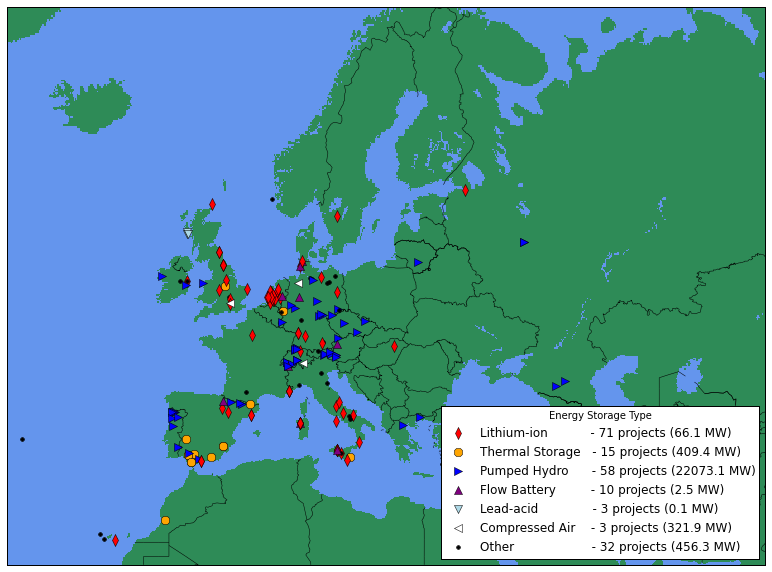

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

markersize = 8

map = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=70,
              llcrnrlon=-30,urcrnrlon=70,resolution='h')
map.drawlsmask(land_color='seagreen',ocean_color='cornflowerblue',lakes=True)
map.drawstates()
map.drawcountries()
count = 7*[0]
total_power = 7*[0]

def inEurope(lat, lon):
    if lat > 25 and lat < 70 and lon > -30 and lon < 70:
        return True
    else:
        return False
    
for project in d.keys():
    if inEurope(d[project]['latitude'], d[project]['longitude']):
        if d[project]['category'] == 'Lithium-ion Battery':
            color = 'Red'
            marker = 'd'
            count[0] = count[0] + 1
            total_power[0] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Flow Battery':
            color = 'Purple'
            marker = '^'
            count[1] = count[1] + 1
            total_power[1] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Lead-acid Battery':
            color = 'LightBlue'
            marker = 'v'
            count[2] = count[2] + 1
            total_power[2] += d[project]['power']/1000.0
        elif 'Pumped Hydro' in d[project]['category']:
            color = 'Blue'
            marker = '>'
            count[3] = count[3] + 1
            total_power[3] += d[project]['power']/1000.0
        elif d[project]['category'] == 'Compressed Air Storage':
            color = 'White'
            marker = '<'
            count[4] = count[4] + 1
            total_power[4] += d[project]['power']/1000.0
        elif 'Thermal' in d[project]['category']:
            color = 'Orange'
            marker = '8'
            count[5] = count[5] + 1
            total_power[5] += d[project]['power']/1000.0
        else:
            color = 'Black'
            marker = '.'
            count[6] = count[6] + 1
            total_power[6] += d[project]['power']/1000.0
        x,y  = map(d[project]['longitude'], d[project]['latitude'])
        map.plot(x,y,marker=marker,color=color, markersize=markersize, label=d[project]['category'])
    

liion = plt.Line2D([0,0],[0,1], color='Red', marker='d', linestyle='', markersize=markersize)
flow = plt.Line2D([0,0],[0,1], color='Purple', marker='^', linestyle='', markersize=markersize)
lead = plt.Line2D([0,0],[0,1], color='LightBlue', marker='v', linestyle='', markersize=markersize)
hydro = plt.Line2D([0,0],[0,1], color='Blue', marker='>', linestyle='', markersize=markersize)
caes = plt.Line2D([0,0],[0,1], color='White', marker='<', linestyle='', markersize=markersize)
thermal = plt.Line2D([0,0],[0,1], color='Orange', marker='8', linestyle='', markersize=markersize)
other = plt.Line2D([0,0],[0,1], color='Black', marker='.', linestyle='', markersize=markersize)
ax.legend([liion, thermal, hydro, flow, lead, caes, other], ["Lithium-ion           - " + str(count[0]) + ' projects (' + str(round(total_power[0],1)) + ' MW)',
                                                               "Thermal Storage   - " + str(count[5]) + ' projects (' + str(round(total_power[5],1)) + ' MW)',
                                                               "Pumped Hydro      - " + str(count[3]) + ' projects (' + str(round(total_power[3],1)) + ' MW)',
                                                               "Flow Battery         - " + str(count[1]) + ' projects (' + str(round(total_power[1],1)) + ' MW)', 
                                                               "Lead-acid              - " + str(count[2]) + ' projects (' + str(round(total_power[2],1)) + ' MW)', 
                                                               "Compressed Air    - " + str(count[4]) + ' projects (' + str(round(total_power[4],1)) + ' MW)',
                                                               "Other                    - " + str(count[6]) + ' projects (' + str(round(total_power[6],1)) + ' MW)']
          , loc = 'lower right', numpoints=1, title='Energy Storage Type')
plt.show()